In [3]:
import sys
#!{sys.executable} -m pip install wordcloud
#!{sys.executable} -m pip install textblob
#!{sys.executable} -m pip install pyLDAvis
#!{sys.executable} -m pip install gensim
#!{sys.executable} -m textblob.download_corpora
import nltk
#nltk.download("stopwords")

     |████████████████████████████████| 163kB 2.1MB/s eta 0:00:01
     |████████████████████████████████| 645kB 882kB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 2.2MB/s eta 0:00:01
     |████████████████████████████████| 552kB 30.5MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=a6f9f564fbc458e50ded9a99ecc8fb07e3a80cc79b6e18d7d3917d5be44d8587
  Stored in directory: /Users/rahulbhasin/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32040 sha256=71e461a3050b0d1d5819e9f40f582e4e4444c20098e4a6c163c670819ec76bcc
  Stored in directory: /Users/rahulbhasin/Library/Caches/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy
     |████████████████████████████████| 23.7MB 423kB/s eta 0:00:01
     |████████████████████████████████| 112kB 50.5MB/s eta 0:00:01


     |████████████████████████████████| 133kB 27.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 13.9MB/s eta 0:00:01
     |████████████████████████████████| 6.1MB 19.6MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-1.11.1-cp37-none-any.whl size=95257 sha256=4b7ebe22cfe7b9c3541b6f1fd21bfe101b140fb7ccdfeca05386baddb98d5531
  Stored in directory: /Users/rahulbhasin/Library/Caches/pip/wheels/51/88/6c/2bcd305b87c1e62cbcbf419e782ad9fc612cd4bbb71557502d
Successfully built smart-open
[nltk_data] Downloading package brown to
[nltk_data]     /Users/rahulbhasin/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulbhasin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rahulbhasin/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulbhasin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS  ## FIX: pip uninstall PIL | pip uninstall Pillow | pip install Pillow
from textblob import TextBlob
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from gensim.models import ldamodel
import pickle
import scipy as sp
from pylab import figure, axes, pie, title, show
%matplotlib inline

unable to import 'smart_open.gcs', disabling that module


In [10]:
raw_data = pd.read_csv('/Users/rahulbhasin/Google Drive/UC BANA/BANA Lectures/Sem 2 - 2nd Flex/Data Mining 2/Data Mining 2 Project/UC_Reviews_Dataset.csv',encoding='cp1252')

In [11]:
raw_data.head()

,Date,Review
0,28-Mar,UC has saved my life about four different occa...
1,19-Mar,The promise of computers The promise of comput...
2,18-Mar,I am a second generation Bearcat and my daught...
3,6-Mar,The staff are nice and welcoming
4,6-Mar,Awesome place and staff..


In [12]:
raw_data_v1=raw_data.copy()

#Lower case reviews
raw_data_v1['Review'] = raw_data_v1['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Removing Punctuations, Numbers, and Special Characters (including #)
raw_data_v1['Review'] = raw_data_v1['Review'].str.replace("[^a-zA-Z]", " ")

#Remove stop words
stopwords_set = set(stopwords.words("english"))
raw_data_v1['Review'] = raw_data_v1['Review'].apply(lambda x: ' '.join([w for w in x.split() if not w in stopwords_set]))

#Remove all the words having length 2 or less
raw_data_v1['Review'] = raw_data_v1['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

#Lemmatization
from textblob import Word
raw_data_v1['Review'] = raw_data_v1['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Spelling correction
#from textblob import TextBlob
#raw_data['Review'] = raw_data['Review'].apply(lambda x: str(TextBlob(x).correct()))

raw_data_v1.head()

,Date,Review
0,28-Mar,uc saved life four different occasion love see...
1,19-Mar,promise computer promise computer human brain ...
2,18-Mar,second generation bearcat daughter third gener...
3,6-Mar,staff nice welcoming
4,6-Mar,awesome place staff


In [16]:
#Removing Frequent Unnecessary Words
freq = pd.Series(' '.join(raw_data_v1['Review']).split()).value_counts()[:50]
print('Frequent Words List:\n',freq)
print('\n')

freq = list(freq.index)
#raw_data_v1['Review'] = raw_data_v1['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in 
#                                                                       ['told'] ))
raw_data_v1['Review'].head()

Frequent Words List:
 great          69
campus         68
student        53
uc             43
university     38
college        34
school         31
program        29
year           27
beautiful      26
love           25
experience     23
nice           23
cincinnati     21
go             21
class          20
awesome        20
staff          19
get            18
lot            18
education      18
amazing        17
place          17
daughter       16
would          16
bearcat        15
son            14
people         14
time           13
one            13
good           13
really         13
opportunity    13
many           12
life           12
co             12
best           11
wonderful      11
look            9
freshman        9
friendly        9
dorm            9
business        9
op              9
graduate        9
even            9
never           9
proud           9
visit           8
today           8
dtype: int64




0    uc saved life four different occasion love see...
1    promise computer promise computer human brain ...
2    second generation bearcat daughter third gener...
3                                 staff nice welcoming
4                                  awesome place staff
Name: Review, dtype: object

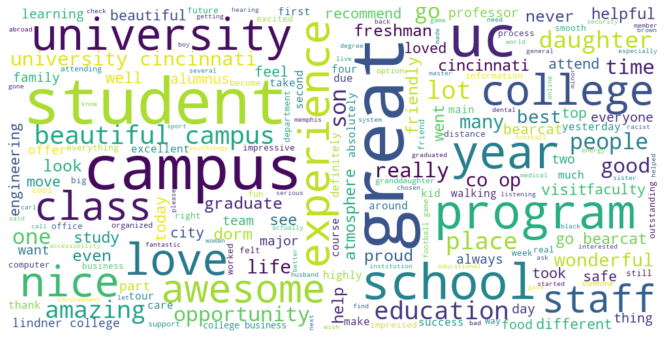

In [17]:
all_words = ' '.join([text for text in raw_data_v1['Review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=110,background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
#plt.show().savefig('plt.png')

In [10]:
############################
######### NOT USED #########
############################

#Tokenization and #Stemming

#Tokenization
tokenized_reviews = raw_data_v1['Review'].apply(lambda x: x.split())
tokenized_reviews.head()

#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_reviews = tokenized_reviews.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_reviews.head()

for i in range(len(tokenized_reviews)):
    tokenized_reviews[i] = ' '.join(tokenized_reviews[i])
raw_data_v1['Review'] = tokenized_reviews

raw_data_v1.head()

,Date,Type,Product,Rating,Recommendation,Review
0,11/20/2018,NaN,NaN,NaN,0.0,still wait three week complaint respons regard...
1,11/20/2018,NaN,NaN,NaN,0.0,expect item deliv friday novemb arriv expect a...
2,11/20/2018,NaN,NaN,NaN,0.0,truli horrif custom servic warn peopl shop onl...
3,11/20/2018,NaN,NaN,NaN,0.0,absolut disgrac bought repair eye accept obvio...
4,11/20/2018,NaN,NaN,NaN,0.0,shock order phone store took min even find ord...


In [19]:
#Term Frequency – Inverse Document Frequency (TF-IDF)

tf1 = (raw_data_v1['Review']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
#tf1.head()
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(raw_data_v1.shape[0]/(len(raw_data_v1[raw_data_v1['Review'].str.contains(word)])))
#tf1.head()
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.sort_values(by='tfidf', ascending=False).head(10)

,words,tf,idf,tfidf
53,student,53.0,1.844403,97.753370
71,campus,68.0,1.412270,96.034350
27,great,69.0,1.360977,93.907382
126,university,38.0,2.021334,76.810689
43,year,27.0,2.564949,69.253633
73,college,34.0,1.958814,66.599661
256,school,31.0,2.054124,63.677836
91,program,29.0,2.159484,62.625043
96,class,20.0,2.970414,59.408289
94,nice,23.0,2.564949,58.993835


In [22]:
#Polarity and Subjectivity
#TextBlob handles negation, modifier words (like 'very' etc.)

raw_data_v1['Polarity']= ""
raw_data_v1['Subjectivity']= ""
for i in range(len(raw_data_v1['Review'])):
    raw_data_v1['Polarity'][i] = raw_data_v1['Review'].apply(lambda x:TextBlob(x))[i].sentiment.polarity
    raw_data_v1['Subjectivity'][i] = raw_data_v1['Review'].apply(lambda x:TextBlob(x))[i].sentiment.subjectivity
raw_data_v1.head(10)    

,Date,Review,Polarity,Subjectivity
0,28-Mar,uc saved life four different occasion love see...,0.343333,0.571667
1,19-Mar,promise computer promise computer human brain ...,0.15,0.55
2,18-Mar,second generation bearcat daughter third gener...,0.361039,0.47013
3,6-Mar,staff nice welcoming,0.6,1
4,6-Mar,awesome place staff,1,1
5,16-Feb,grandson go love,0.5,0.6
6,13-Feb,student learning physical disability uc done n...,-0.0478175,0.300454
7,12-Feb,ohio stat university colledge fotcball breed,0,0
8,1-Feb,great place hoping enroll,0.8,0.75
9,30-Jan,great university coop program great,0.8,0.75


In [23]:
raw_data_v1['Polarity']  = raw_data_v1['Polarity'].astype('float64')
raw_data_v1['Subjectivity']  = raw_data_v1['Subjectivity'].astype('float64')

In [24]:
raw_data_v1.describe(percentiles=(0.25,0.50,0.75))

,Polarity,Subjectivity
count,234.000000,234.000000
mean,0.414343,0.549445
std,0.329620,0.321955
min,-0.500000,0.000000
25%,0.100781,0.327083
50%,0.422500,0.600000
75%,0.700000,0.769167
max,1.000000,1.000000


In [25]:
raw_data_v1.dtypes

Date             object
Review           object
Polarity        float64
Subjectivity    float64
dtype: object

In [45]:
raw_data_v1.to_excel('C:/Users/rahul.bhasin/Desktop/Currys PC World/Python/Review Data (Cleaned) v2.xlsx',index=False)

In [16]:
tf1.sort_values(by='tfidf', ascending=False).to_excel('C:/Users/rahul.bhasin/Desktop/Currys PC World/Python/tf_idf.xlsx',index=False)

In [17]:
pd.DataFrame(freq).to_excel('C:/Users/rahul.bhasin/Desktop/Currys PC World/Python/freq.xlsx')

In [ ]:
##Topic Modeling using LDA

In [26]:
tokenized_reviews = pd.Series(raw_data_v1['Review']).apply(lambda x: x.split())
print(tokenized_reviews[1])

['promise', 'computer', 'promise', 'computer', 'human', 'brain', 'powerful', 'computer', 'earth', 'along', 'supercomputer', 'quantum', 'computer', 'powerful', 'human', 'being', 'earth']


In [27]:
dictionary = corpora.Dictionary(tokenized_reviews)

In [28]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [31]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=3, random_state=100,
                chunksize=1000, passes=50)

In [32]:
lda_model.print_topics()

[(0,
  '0.026*"campus" + 0.018*"student" + 0.014*"nice" + 0.013*"beautiful" + 0.012*"uc" + 0.010*"university" + 0.009*"really" + 0.008*"time" + 0.008*"college" + 0.007*"go"'),
 (1,
  '0.048*"great" + 0.016*"program" + 0.016*"campus" + 0.016*"school" + 0.014*"college" + 0.013*"awesome" + 0.011*"education" + 0.011*"love" + 0.011*"year" + 0.009*"student"'),
 (2,
  '0.014*"student" + 0.014*"university" + 0.014*"uc" + 0.012*"experience" + 0.010*"campus" + 0.009*"cincinnati" + 0.008*"get" + 0.007*"beautiful" + 0.006*"amazing" + 0.006*"love"')]

In [33]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 10);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [35]:
get_lda_topics(lda_model, 3)

,Topic # 01,Topic # 02,Topic # 03
0,campus,great,student
1,student,program,university
2,nice,campus,uc
3,beautiful,school,experience
4,uc,college,campus
5,university,awesome,cincinnati
6,really,education,get
7,time,love,beautiful
8,college,year,amazing
9,go,student,love


In [36]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/Users/rahulbhasin/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.081696 -0.062124       1        1  35.599480
1     -0.104142 -0.029077       2        1  34.835224
2      0.022446  0.091201       3        1  29.565302, topic_info=    Category       Freq       Term      Total  loglift  logprob
22   Default  50.000000      great  50.000000  30.0000  30.0000
3    Default  15.000000    awesome  15.000000  29.0000  29.0000
172  Default  19.000000  beautiful  19.000000  28.0000  28.0000
324  Default  13.000000  education  13.000000  27.0000  27.0000
92   Default  17.000000       nice  17.000000  26.0000  26.0000
..       ...        ...        ...        ...      ...      ...
30    Topic3   4.764511       love  18.578745  -0.1423  -5.1548
57    Topic3   4.496206       year  20.039684  -0.2759  -5.2127
74    Topic3   4.425443    college  25.085260  -0.5163  -5.2286
182   Topic3   3.063746       dorm   7.124554   0.3747  -5.5963
37    Topic3   3.077655        one  10.025187   0.0376  -5.5918

[201 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
218       3  0.940639           able
97        3  0.706322  accessibility
175       1  0.862313        alumnus
0         1  0.201209         always
0         3  0.804836         always
...     ...       ...            ...
56        3  0.329471          would
565       3  0.942862            www
57        1  0.249505           year
57        2  0.548911           year
57        3  0.199604           year

[246 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [ ]:
##Topic Modeling using NMF

In [ ]:
#https://medium.com/ml2vec/topic-modeling-is-an-unsupervised-learning-approach-to-clustering-documents-to-discover-topics-fdfbf30e27df

In [37]:
vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(raw_data_v1['Review']);

In [38]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

In [39]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [40]:
#obtain a NMF model.
num_topics=3
model = NMF(n_components=num_topics, init='nndsvd');
#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=3, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [41]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [43]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03
0,great,awesome,campus
1,education,place,beautiful
2,atmosphere,staff,nice
3,place,rotc,staff
4,love,leadership,friendly
